## Philipp Panzenböck

#### The following codes show data query, data processing and data visualization with different visualization methods.

#### Importing modules

In [1]:
#Importing the relevant modules
import requests
import io
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import matplotlib as mpl

import seaborn as sns
import matplotlib.pyplot as plt

import os
import sys
import mpl_chord_diagram as mpl_cd
from mpl_chord_diagram import chord_diagram

from IPython.display import display, Image

### Chord chart

In [2]:
# Building blocks for the URL
entrypoint = 'https://sdw-wsrest.ecb.europa.eu/service/'
resource = 'data'
flowRef ='BSI'
# Loans vis-a-vis MFI reported by MFI excluding ESCB - country to country (selected countries) (stock) - 2021-Q4 
key_p1 = '.N.A.A20.A.1.'
key_p2 = '.1000.Z01.E'
country_list = ['AT','BE','BG','CY','CZ','DK','DE','EE','ES','FI','FR','GB','GR','HR','HU','IE','IT','LT',
                'LU','LV','MT','NL','PL','PT','RO','SE','SI','SK']

parameters = {
    'startPeriod': '2021-09-30',
    'endPeriod':   '2021-12-31'
}

#### Query of further data from the SDW

In [4]:
df_chord = pd.DataFrame()

for country_ref in country_list:
    for country_count in country_list:
        if country_ref != country_count:
            #print(f'Q.{country_ref}{key_p1}{country_count}{key_p2}')
            # Construct the URL: https://sdw-wsrest.ecb.europa.eu/service/data/EXR/D.CHF.EUR.SP00.A
            request_url = entrypoint + resource + '/'+ flowRef + '/Q.' + country_ref + key_p1 + country_count + key_p2
            # Make the HTTP request
            response = requests.get(request_url, params=parameters)
            # Make the HTTP request again, now requesting for CSV format
            response = requests.get(request_url, params=parameters, headers={'Accept': 'text/csv'})
            # Read the response as a file into a Pandas DataFrame
            if response.text != '': 
                df_temp = pd.read_csv(io.StringIO(response.text))

                df_temp = df_temp.filter(['OBS_VALUE','REF_AREA', 'COUNT_AREA'], axis=1)

                df_chord = df_chord.append(df_temp)
                #print(df)

In [5]:
df_chord = df_chord.replace(np.nan,0)

In [6]:
df_chord.head(3)

,OBS_VALUE,REF_AREA,COUNT_AREA
0,416.0,AT,BE
0,0.0,AT,BG
0,0.0,AT,CY


In [7]:
df_chord = df_chord.sort_values(['REF_AREA','COUNT_AREA'])
df_pivot_chord = pd.pivot_table(df_chord, values='OBS_VALUE', index='REF_AREA',
                    columns='COUNT_AREA', aggfunc=np.sum, fill_value=0)

In [8]:
df_pivot_chord = df_pivot_chord[list(df_pivot_chord.index)]
df_pivot_chord = df_pivot_chord.reset_index()
df_pivot_chord = df_pivot_chord.round(0)

In [9]:
col_names = list(df_pivot_chord.columns)
col_names.remove('REF_AREA')

In [10]:
chord_matrix = df_pivot_chord[col_names].to_numpy()

In [12]:
save_dpi=300

chord_diagram(chord_matrix, col_names, gap=0.03, use_gradient=True, sort="size", directed=False,
              cmap=None, chord_colors=None, rotate_names=False, fontcolor="grey", min_chord_width=1000, show=False, fontsize=7)

plt.savefig(f'Chart_7.png', dpi=save_dpi, bbox_inches='tight')
plt.close()

### Chord-Chart: Loans vis-a-vis MFI reported by MFI excluding ESCB - country to country (selected countries) (stock) - 2021-Q4 

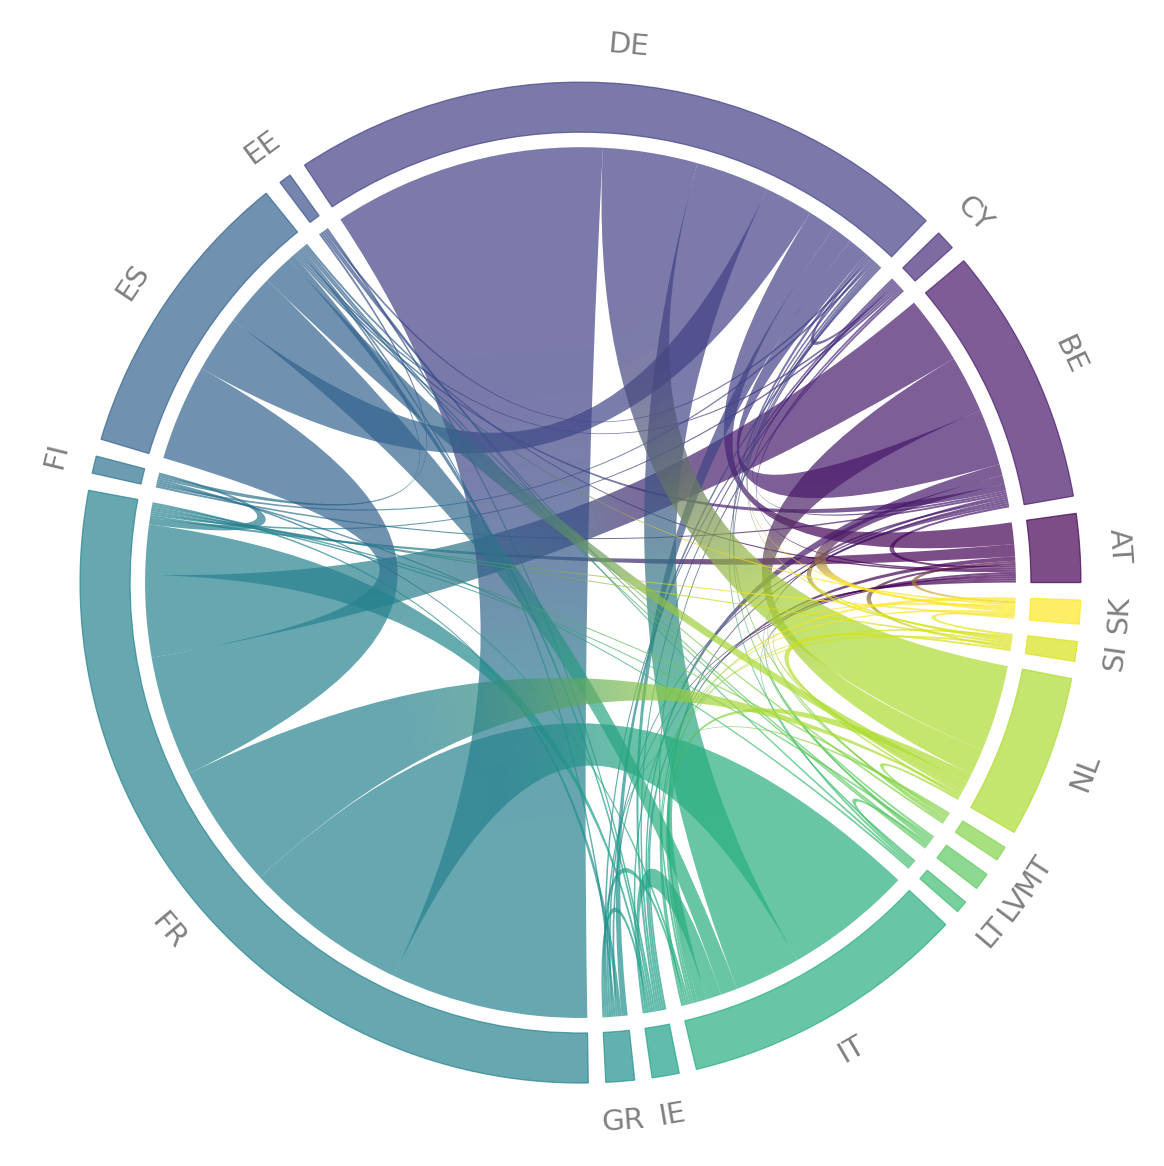

In [13]:
display(Image(filename='Chart_7.png'))